<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%86%D0%B2%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Гистограмма цвета

# Color histogram


В этом уроке мы научимся строить гистограмму  света

In this lesson we will learn how to draw a histogram of light


В предыдущем уроке мы исследовали гистограммы для черно-белых изображений. Сейчас же мы будем делать это же, но для цветных примеров.

In the previous lesson we explored histograms for black and white images. Now we are going to do the same, but for color examples.

Первое, что мы сделаем - это разделим изображение на 3 отдельных канала. Однако стоит помнить, что cv воспринимает изображения в BRG, а не в RGB, поэтому не забываем конвертировать. 

The first thing we'll do is to divide the image into 3 separate channels. However, remember that cv takes images in BRG, not RGB, so do not forget to convert. 


Далее мы будем по-отдельности работать с каждым из каналов по такому же принципу, как и при чб, чтобы в результате наложить эти графики друг на друга.


Next, we will work separately with each of the channels in the same way as in B&W, so as a result we will overlay these graphs on top of each other.



In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_33.Histogram_color.zip
!unzip Lesson_33.Histogram_color.zip
%cd /content/Lesson_33.Histogram_color

--2022-02-04 17:35:10--  http://dataudt.ru/datasets/cv/Lesson_33.Histogram_color.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 976361 (953K) [application/zip]
Saving to: ‘Lesson_33.Histogram_color.zip’

Lesson_33.Histogram 100%[===================>] 953.48K  1.38MB/s    in 0.7s    

2022-02-04 17:35:11 (1.38 MB/s) - ‘Lesson_33.Histogram_color.zip’ saved [976361/976361]

Archive:  Lesson_33.Histogram_color.zip
  inflating: Lesson_33.Histogram_color/elbrus.png  
  inflating: Lesson_33.Histogram_color/Histogram_color.py  
  inflating: Lesson_33.Histogram_color/palm.png  
/content/Lesson_33.Histogram_color


In [2]:
# импортируем необходимые модули
# import the necessary packages
from matplotlib import pyplot as plt
import imutils
import cv2

In [3]:
# создаем отдельный словарь с аргументами 
# create a separate dictionary with arguments 
args = {
# путь к входному изображению 
# the path to the input image
'image':'palm.png', 
}

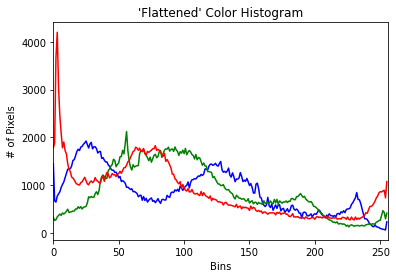

In [4]:
# загружаем изображение
# load the image
image = cv2.imread(args["image"])

# захватываем каналы изображения, 
# инициализируем кортеж цветов и окно графика
# grab the image channels, initialize the tuple of colors and the
# figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# перебираем каналы изображений
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # создаем гистограмму для текущего канала и строим ее
    # create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color = color)
	plt.xlim([0, 256])




plt.show()

Теперь попробуем визуализировать двухмерную гистограмму для пары каналов, так как при ее использовании одновременно учитываются два канала.

Now let's try to visualize a two-dimensional histogram for a pair of channels, since it takes into account two channels simultaneously.

Первая - это двухмерная цветовая гистограмма для зеленого и синего каналов

The first is a two-dimensional color histogram for the green and blue channels

Вторая - для зеленого и красного

The second one is for green and red.

Третья - для синего и красного


The third is for blue and red.


2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


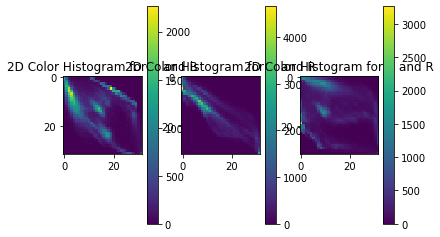

In [5]:
# перейдем к 2D-гистограммам
# нам нужно уменьшить количество бинов
# в гистограмме с 256 до 32, чтобы мы могли 
# лучше визуализировать результаты
# let's move on to 2D histograms -- we need to reduce the
# number of bins in the histogram from 256 to 32 so we can
# better visualize the results
fig = plt.figure()
# построим двухмерную цветную гистограмму 
# для зеленого и синего
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)


# построим двухмерную цветную гистограмму
# для зеленого и красного
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# построим двухмерную цветную гистограмму
# для синего и красного
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# наконец, давайте проверим размерность 
# одной из двухмерных гистограмм
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# наша двухмерная гистограмма может учитывать только 2
# из трех каналов изображения, поэтому теперь давайте 
# построим трехмерную цветную гистограмму (используя все каналы)
# с 8 ячейками в каждом направлении - мы не можем построить 
# трехмерную гистограмму, но теория точно такая же, как у 
# 2D-гистограммы, поэтому мы просто покажем форму гистограммы.
# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))



# отобразим наши графики
# Show our plots
plt.show()

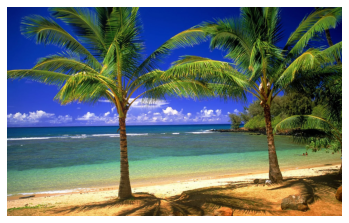

In [6]:
# отображаем изображение с помощью matplotlib
# display the image with matplotlib to avoid GUI conflicts on macOS
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

plt.show()